In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('marketing_campaign.csv')
accepteddf=df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']]
accepteddf

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
2235,0,0,0,0,0
2236,1,0,0,0,0
2237,0,0,0,1,0
2238,0,0,0,0,0


C:\Users\amand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\amand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.13_3.13.752.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 556, in run
    w

Text(0, 0.5, 'WCSS')

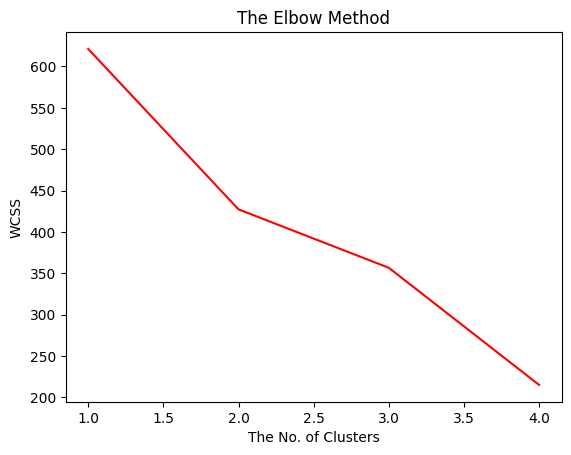

In [3]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,5):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(accepteddf)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,5),wcss,color='red')
plt.title('The Elbow Method')
plt.xlabel('The No. of Clusters')
plt.ylabel('WCSS')

In [4]:
kmeans=KMeans(n_clusters=4, init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(accepteddf)

In [5]:
plt.scatter(accepteddf[y_kmeans == 0, 0], accepteddf[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(accepteddf[y_kmeans == 1, 0], accepteddf[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(accepteddf[y_kmeans == 2, 0], accepteddf[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(accepteddf[y_kmeans == 3, 0], accepteddf[y_kmeans == 3, 1], s = 50, c = 'magenta', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100,c='yellow',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

InvalidIndexError: (array([ True,  True,  True, ..., False,  True,  True], shape=(2240,)), 0)